In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def izhikevic_model(a, b, c, d, dt, time, I, V_rest=-70):
    """
    Simulate Izhikevich neuron dynamics.
    """
    max_value = 30
    V = np.zeros(len(time))
    V[0] = V_rest
    u = np.zeros(len(time))
    u[0] = b * V_rest

    for t in range(1, len(time)):
        if V[t-1] < max_value:
            dV = (0.04 * V[t-1] + 5) * V[t-1] + 140 - u[t-1]
            V[t] = V[t-1] + (dV + I[t-1]) * dt
            du = a * (b * V[t-1] - u[t-1])
            u[t] = u[t-1] + dt * du
        else:
            V[t-1] = max_value
            V[t] = c
            u[t] = u[t-1] + d

    return V, u

In [3]:
def phase_plane_plot(V, u):
    """
    Plot the phase plane (V vs u).
    """
    plt.figure(figsize=(6, 6))
    plt.plot(V, u, color="blue")
    plt.title("Phase Plane (V vs u)")
    plt.xlabel("Membrane Potential V [mV]")
    plt.ylabel("Recovery Variable u")
    plt.grid(True)
    plt.show()

In [4]:
def plotting(title, time, V, I):
    plt.figure(figsize=(10, 5))
    plt.subplot(2, 1, 1)
    plt.plot(time, I, color="red")
    plt.ylabel("Input Current [mA]")
    plt.title(title)
    plt.subplot(2, 1, 2)
    plt.plot(time, V)
    plt.xlabel("Time [ms]")
    plt.ylabel("Membrane Potential [mV]")
    plt.show()

In [5]:
# Simulation parameters
dt = 0.25
time = np.arange(0, 200, dt)

In [6]:
# Different types of input currents
I_step = np.zeros(len(time))
I_step[50:150] = 10  # Step current
I_sine = 5 * np.sin(0.1 * time)  # Sinusoidal input
I_noise = np.random.normal(5, 2, len(time))  # Noisy input

input_types = {"Step Current": I_step, "Sinusoidal Current": I_sine, "Noisy Current": I_noise}


In [7]:
# Parameter exploration
def explore_parameters(a_values, b_values, time, I):
    plt.figure(figsize=(15, 10))
    for i, a in enumerate(a_values):
        for j, b in enumerate(b_values):
            V, _ = izhikevic_model(a, b, -65, 8, dt, time, I)  # Extract V only
            plt.subplot(len(a_values), len(b_values), i * len(b_values) + j + 1)
            plt.plot(time, V)
            plt.title(f"a={a}, b={b}")
            plt.xlabel("Time [ms]")
            plt.ylabel("Membrane Potential [mV]")
    plt.tight_layout()
    plt.show()

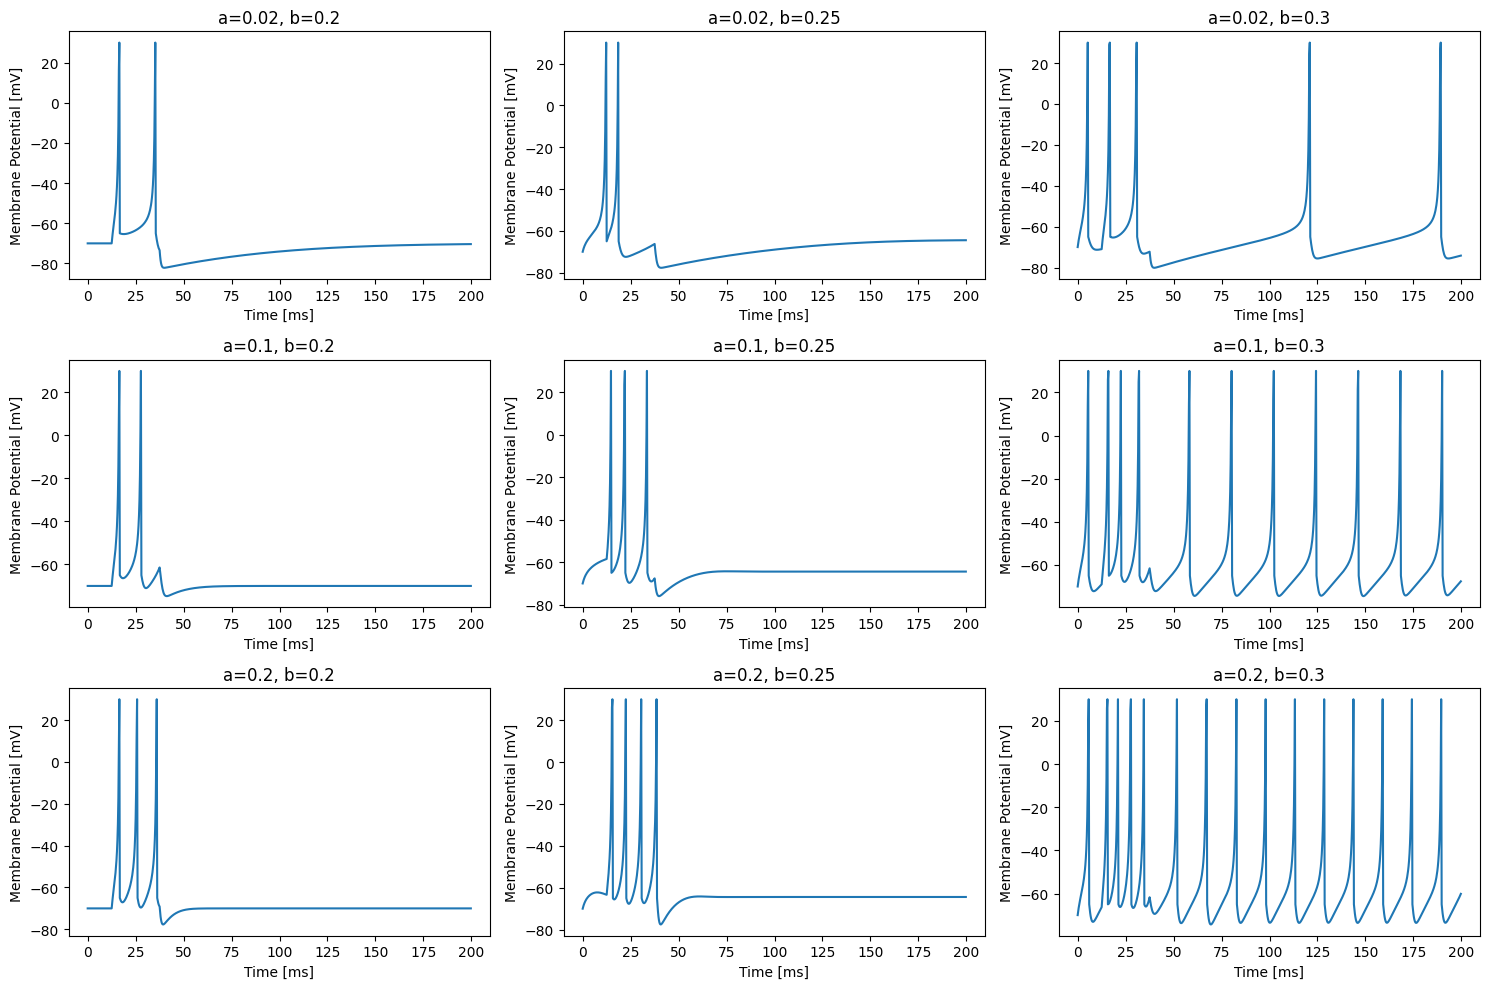

In [8]:
a_values = [0.02, 0.1, 0.2]
b_values = [0.2, 0.25, 0.3]
explore_parameters(a_values, b_values, time, I_step)

In [9]:
# Different neuron types
neurons = {
    "Regular Spiking": (0.02, 0.2, -65, 8),
    "Fast Spiking": (0.1, 0.2, -65, 2),
    "Chattering": (0.02, 0.2, -50, 2)
}

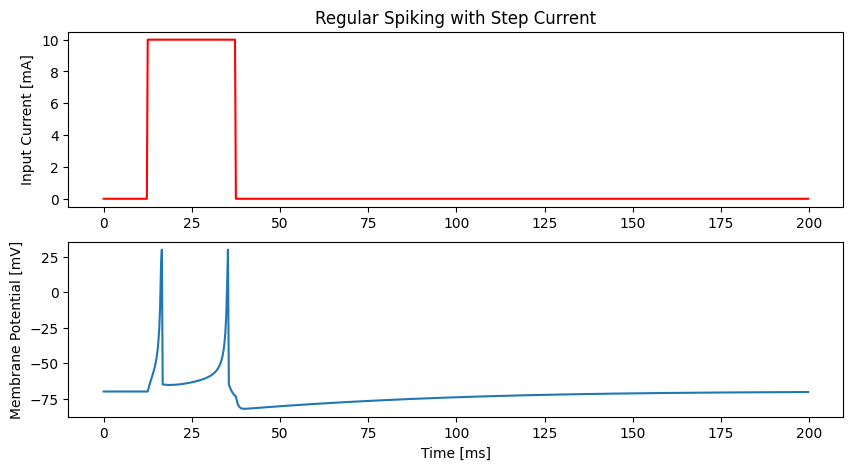

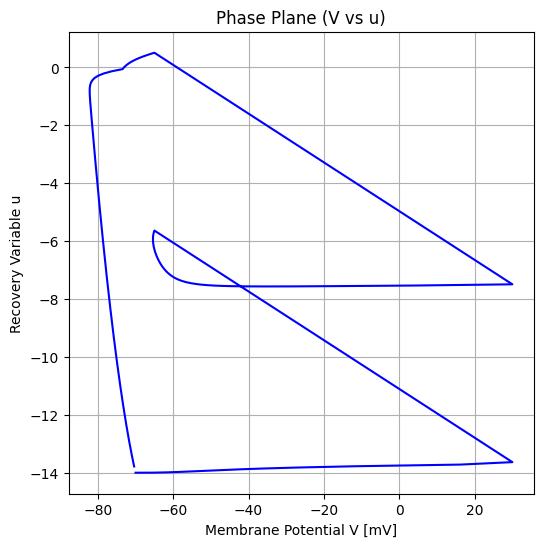

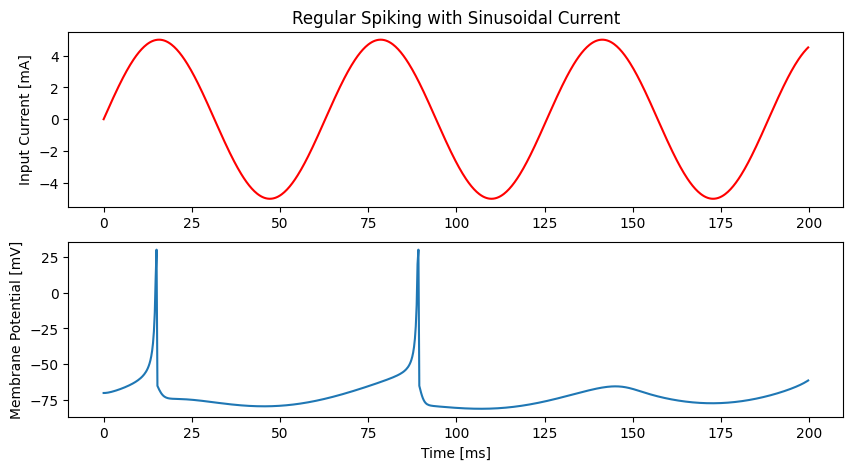

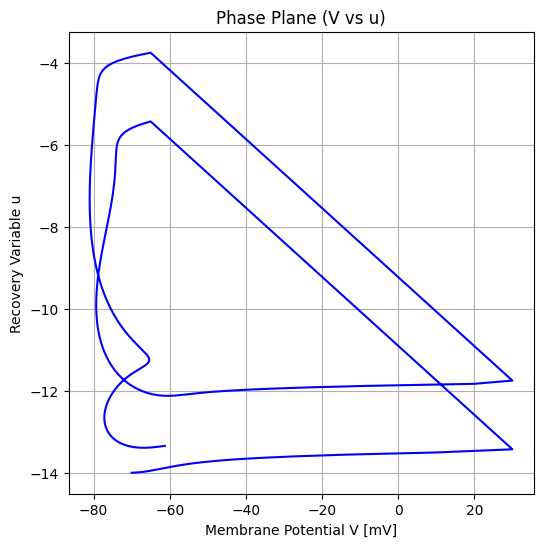

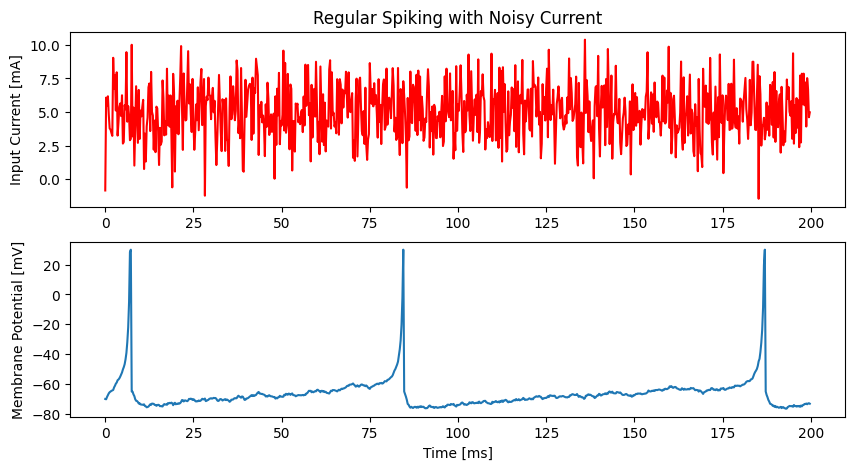

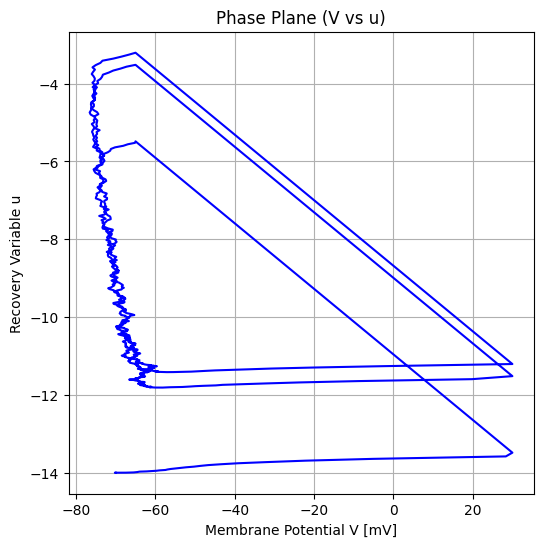

In [10]:
a, b, c, d = neurons["Regular Spiking"]
for input_name, I in input_types.items():
    V, u = izhikevic_model(a, b, c, d, dt, time, I)
    plotting(f"Regular Spiking with {input_name}", time, V, I)
    phase_plane_plot(V, u)  # Add phase plane plot

In [11]:
# Firing Rate vs. Input Current (F-I Curve)
input_levels = np.linspace(0, 20, 20)
firing_rates = []

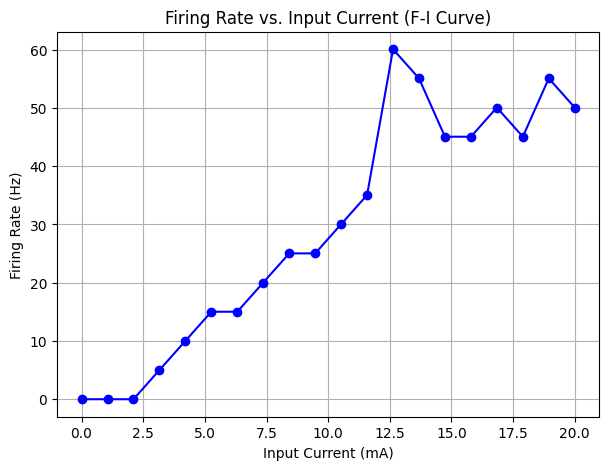

In [12]:
for I_const in input_levels:
    I = np.full(len(time), I_const)
    V, _ = izhikevic_model(a, b, c, d, dt, time, I)  # Extract V only
    spikes = np.where(V > 20)[0] * dt
    firing_rate = len(spikes) / (time[-1] / 1000)  # Convert to Hz
    firing_rates.append(firing_rate)

plt.figure(figsize=(7, 5))
plt.plot(input_levels, firing_rates, marker='o', linestyle='-', color='b')
plt.xlabel("Input Current (mA)")
plt.ylabel("Firing Rate (Hz)")
plt.title("Firing Rate vs. Input Current (F-I Curve)")
plt.grid(True)
plt.show()


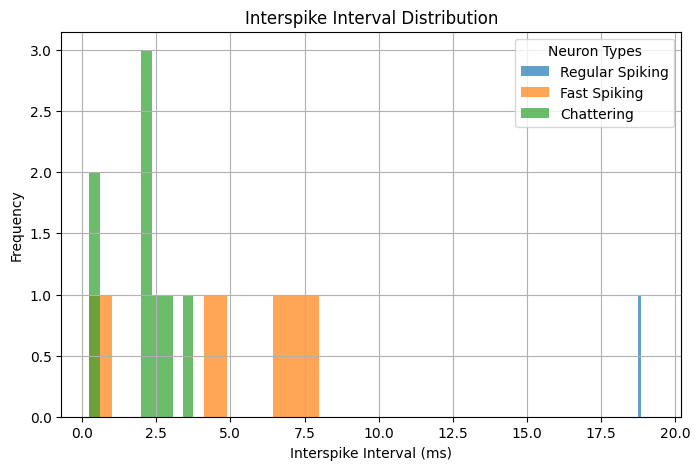

In [13]:
# Additional analysis: Interspike Intervals
plt.figure(figsize=(8, 5))
for name, params in neurons.items():
    V, _ = izhikevic_model(*params, dt, time, I_step)  # Extract V only
    spikes = np.where(V > 20)[0] * dt
    if len(spikes) > 1:
        ISIs = np.diff(spikes)
        plt.hist(ISIs, bins=10, alpha=0.7, label=name)

plt.xlabel("Interspike Interval (ms)")
plt.ylabel("Frequency")
plt.title("Interspike Interval Distribution")
plt.legend(title="Neuron Types")
plt.grid(True)
plt.show()